<a href="https://colab.research.google.com/github/yashsinghal11/Data-Science_-Theory-Coding_tutorial-/blob/main/DecisionTreetutorial1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("traffic_accident_prediction1.csv")

In [2]:
df.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [3]:
df.isnull().sum()

,0
Weather,42
Road_Type,42
Time_of_Day,42
Traffic_Density,42
Speed_Limit,42
Number_of_Vehicles,42
Driver_Alcohol,42
Accident_Severity,42
Road_Condition,42
Vehicle_Type,42


In [4]:
numeric_cols=["Traffic_Density","Speed_Limit","Number_of_Vehicles","Driver_Alcohol","Driver_Age","Driver_Experience","Accident"]
for col in numeric_cols:
  df[col].fillna(df[col].median(),inplace=True)

/tmp/ipython-input-2793678837.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)


In [6]:
categorical_cols=["Weather","Road_Type","Time_of_Day","Accident_Severity","Road_Condition","Vehicle_Type","Road_Light_Condition"]
for col in categorical_cols:
  df[col].fillna('unknown',inplace=True)

/tmp/ipython-input-1833973062.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('unknown',inplace=True)


In [7]:
for col in categorical_cols:
  df[col]=df[col].astype('category').cat.codes

In [8]:
df.isnull().sum()


,0
Weather,0
Road_Type,0
Time_of_Day,0
Traffic_Density,0
Speed_Limit,0
Number_of_Vehicles,0
Driver_Alcohol,0
Accident_Severity,0
Road_Condition,0
Vehicle_Type,0


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               840 non-null    int8   
 1   Road_Type             840 non-null    int8   
 2   Time_of_Day           840 non-null    int8   
 3   Traffic_Density       840 non-null    float64
 4   Speed_Limit           840 non-null    float64
 5   Number_of_Vehicles    840 non-null    float64
 6   Driver_Alcohol        840 non-null    float64
 7   Accident_Severity     840 non-null    int8   
 8   Road_Condition        840 non-null    int8   
 9   Vehicle_Type          840 non-null    int8   
 10  Driver_Age            840 non-null    float64
 11  Driver_Experience     840 non-null    float64
 12  Road_Light_Condition  840 non-null    int8   
 13  Accident              840 non-null    float64
dtypes: float64(7), int8(7)
memory usage: 51.8 KB


In [10]:
df.describe()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,1.426190,1.222619,1.320238,1.001190,70.497619,3.272619,0.152381,1.292857,1.146429,1.459524,43.246429,38.982143,0.711905,0.284524
std,1.461229,1.148856,1.192375,0.764996,31.332695,1.967123,0.359604,0.704115,1.320504,0.917726,14.746406,14.886008,0.828774,0.451456
min,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,9.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,1.000000,0.000000,1.000000,31.000000,26.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,60.000000,3.000000,0.000000,1.000000,1.000000,1.000000,43.000000,39.000000,1.000000,0.000000
75%,2.000000,1.000000,2.000000,2.000000,80.000000,4.000000,0.000000,2.000000,2.000000,2.000000,55.000000,52.000000,1.000000,1.000000
max,5.000000,4.000000,4.000000,2.000000,213.000000,14.000000,1.000000,3.000000,4.000000,4.000000,69.000000,69.000000,3.000000,1.000000


Accuracy 0.6904761904761905


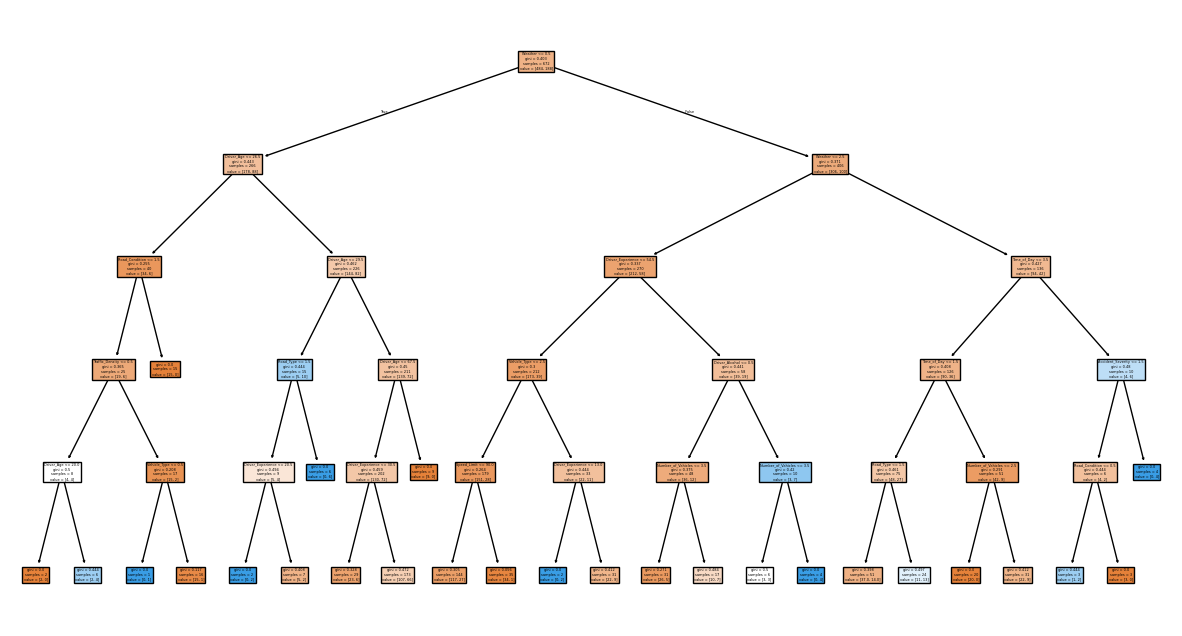

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix

x=df.drop('Accident',axis=1)
y=df['Accident']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier(max_depth=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plot_tree(model,filled=True, feature_names=x.columns)
plt.show()
